# Import thư viện

In [1]:
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding

In [2]:
from keras.callbacks import EarlyStopping

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [6]:
from sklearn.svm import OneClassSVM

In [7]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 31.7 MB/s eta 0:00:00


In [8]:
pip install tensorflow

In [9]:
pip install keras

In [10]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-quau0lx0
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-quau0lx0
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=91bf33c300cf5101d9e542b84530b5b0a05ef7196f609b02855c97e3b0f4d237
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxygk2nq/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [11]:
pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=9e88c85985e8382113cd5f48ef6e6fc7a86ced180a5acd09fca9e3b69fe02e5f
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [12]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2023-10-24 05:30:26--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  53.6MB/s    in 0.5s    

2023-10-24 05:30:28 (53.6 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2023-10-24 05:30:28--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

# Hyperparameters

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
EPOCH = 10
MAX_LEN = 80
BATCH_SIZE = 64
MAX_FEATURE = 10000
EMBEDING_DIM = 300
NUM_LABEL = 68
TOKENIZER = 'vncorenlp'


TRAIN = '/content/drive/MyDrive/Fake job detector/train.csv'
TEST = '/content/drive/MyDrive/Fake job detector/test.csv'
LABEL = '/content/drive/MyDrive/Fake job detector/labels.csv'

MODEL_PATH = '/content/drive/MyDrive/Fake job detector/Bi_GRU_LSTM_CNN + pre-trained word embedding.ipynb'

TASK = 'job_description'

In [15]:
EMBEDDING = '/content/drive/MyDrive/Fake job detector/word2vec_vi_words_300dims.txt'

In [16]:
FAKE_JOB = '/content/drive/MyDrive/Fake job detector/fake_job.csv'

In [17]:
## Tạo file test mới đã có job fake, còn lại append vào file train
import pandas as pd
# Lấy 146 dòng từ file test và gán vào biến test_subset
test_df = pd.read_csv(TEST)
test_subset = test_df.head(146)

# Lấy dòng còn lại từ file test và gán vào biến test_remaining
test_remaining = test_df.tail(len(test_df) - 146)

# Merge test_subset với fake_job_data để tạo file test mới
fake_job_df = pd.read_csv(FAKE_JOB)
new_test_data = pd.concat([test_subset, fake_job_df])
# Xuất file csv
new_test_data.to_csv('/content/drive/MyDrive/Fake job detector/new_test.csv', index=False)
# Merge test_remaining với file test để tạo file train mới
train_job_df = pd.read_csv(TRAIN)
new_train_data = pd.concat([test_remaining,train_job_df ])
# Xuất file csv
new_train_data.to_csv('/content/drive/MyDrive/Fake job detector/new_train.csv', index=False)

In [18]:
test_subset2 = test_df.head(200)
test_remaining2 = test_df.tail(len(test_df) - 200)

new_test_data2 = pd.concat([test_subset2, fake_job_df])
new_test_data2.to_csv('/content/drive/MyDrive/Fake job detector/new_test2.csv', index=False)

new_train_data2 = pd.concat([test_remaining2,train_job_df ])
new_train_data2.to_csv('/content/drive/MyDrive/Fake job detector/new_train2.csv', index=False)

In [19]:
new_test_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 145
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   list_title       323 non-null    object
 1   list_link        341 non-null    object
 2   list_salary      323 non-null    object
 3   level            218 non-null    object
 4   job_description  344 non-null    object
 5   requirement      323 non-null    object
 6   job              322 non-null    object
dtypes: object(7)
memory usage: 21.6+ KB


In [20]:
NEW_TEST = '/content/drive/MyDrive/Fake job detector/new_test.csv'
NEW_TRAIN = '/content/drive/MyDrive/Fake job detector/new_train.csv'

In [21]:
TEST_2= '/content/drive/MyDrive/Fake job detector/new_test2.csv'
TRAIN_2= '/content/drive/MyDrive/Fake job detector/new_train2.csv'

# Load Data

In [22]:
import pandas as pd

train = pd.read_csv(NEW_TRAIN)
test = pd.read_csv(NEW_TEST)
label = pd.read_csv(LABEL)

In [23]:
import numpy as np

def return_label(y):
    lbl_job = []
    for i in range(0, len(y)):
        if y[i] == 1:
            lbl_job.append(job_types[i])

    return lbl_job
def make_label(data):
    lbl_job = []
    for td in data['job'].values:
        l_job_onehot = np.zeros(len(job_types))

        for i in range(0, len(job_types)):
            if job_types[i] in td:
                l_job_onehot[i] = 1
        lbl_job.append(l_job_onehot)

    return lbl_job

In [24]:
job_types = label['job_type'].values

In [25]:
len(train)

24021

In [26]:
len(test)

292

# Word Embedding

In [27]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE

f = open(EMBEDDING)
for line in f:
    values = line.split(' ')
    word = values[0]
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [28]:
words = word_dict
num_words = len(words)

# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary lable:index pair
idx2word = {i: w for w, i in word_to_index.items()}

In [29]:
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [30]:
embedding_dim

300

# Pre-processing

In [31]:
import numpy as np

# Tạo mảng gồm 146 số 1
ones = np.ones(146)

# Tạo mảng gồm 146 số -1
neg_ones = -1 * np.ones(146)

# Kết hợp cả hai mảng
y_true = np.concatenate((ones, neg_ones))

# In ra kích thước của mảng y_true (đảm bảo có đúng 146 số 1 và 146 số 0)
print(y_true.shape)

(292,)


In [32]:
X_train = train[TASK]
X_test = test[TASK]

In [33]:
from pyvi import ViTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical
from vncorenlp import VnCoreNLP
import re

vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

max_len = MAX_LEN

def custom_tokenizer(text_data, tokenizer='pyvi'):
    if tokenizer == 'vncorenlp':
        text = ""
        lst = vncorenlp.tokenize(str(text_data))
        for t in lst:
            text += " ".join(t)
        return text
    if tokenizer == 'none':
        return text_data
    return ViTokenizer.tokenize(str(text_data))

def encoding(X, tokenizer = True):
    sentences = []

    for t in X:
        t = re.sub(r"[-()\"#/@;:<>{}`+=~|!?,]", "", t)
        sentences.append(custom_tokenizer(t, tokenizer=TOKENIZER))

    X = tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(X, maxlen=max_len)


    return (X)


def decoding(text_data, encoding_text, prediction):
    test = [[idx2word[i] for i in row] for row in encoding_text]

    lst_token = []

    for t in range(0, len(test)):
        yy_pred = []
        for i in range(0, len(test[t])):
            if prediction[t][i] == 1:
                yy_pred.append(test[t][i])
        lst_token.append(yy_pred)

    lis_idx = []
    for i in range(0, len(text_data)):
        idx = []
        for t in lst_token[i]:
            index = text_data[i].find(t)
            idx.append(index)
            for j in range(1, len(t)):
                index = index + 1
                idx.append(index)
        lis_idx.append(idx)

    return lis_idx

In [34]:
# Convert float values to strings in X_train
X_train = [str(x) for x in X_train]

In [35]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(X_train)

In [36]:
# Convert float values to strings in X_test
X_test = [str(x) for x in X_test]

In [37]:
X1 = encoding(X_train,tokenizer)
X3 = encoding(X_test, tokenizer)

# LSTM 2.0

### Model 1

#### Define model

In [ ]:
#define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

#return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 21247


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = EMBEDING_DIM
max_sequence_length = MAX_LEN

In [ ]:
# Xây dựng mô hình
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_sequence_length,)),
    Bidirectional(LSTM(units=128, return_sequences=True)),
    Bidirectional(LSTM(units=128)),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Biên dịch mô hình
model.compile(optimizer = optimizer, loss='binary_crossentropy')

#### Training model

In [ ]:
y_true = np.ones(len(X1))

In [ ]:
# Huấn luyện mô hình với dữ liệu X1 và y_true
model.fit(X1, y_true, epochs=5, batch_size=128)

Epoch 1/5
188/188 [==============================] - 316s 2s/step - loss: 0.0156
Epoch 2/5
188/188 [==============================] - 307s 2s/step - loss: 4.3966e-10
Epoch 3/5
188/188 [==============================] - 305s 2s/step - loss: 4.3966e-10
Epoch 4/5
188/188 [==============================] - 307s 2s/step - loss: 4.3966e-10
Epoch 5/5
188/188 [==============================] - 311s 2s/step - loss: 4.3966e-10


In [ ]:
y_pred = model.predict(X3)

10/10 [==============================] - 5s 252ms/step


In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
y_test = np.concatenate((np.ones(146), np.zeros(146)))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


In [ ]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# In confusion matrix
print(cm)

[[  0 146]
 [  0 146]]


### Model 2

In [ ]:
#model = tf.keras.Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index), 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

In [ ]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 128)           2719744   
                                                                 
 bidirectional_4 (Bidirecti  (None, 80, 256)           263168    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

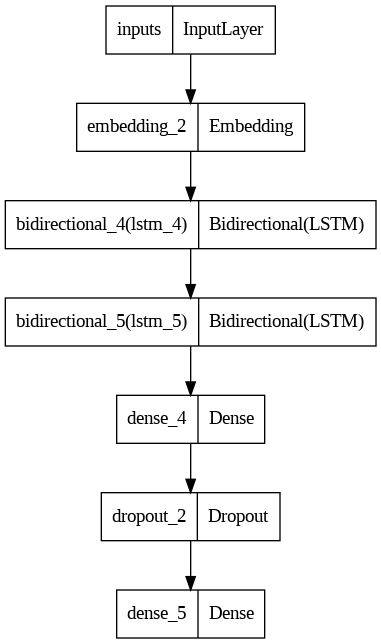

In [ ]:
#plot the model architecture
tf.keras.utils.plot_model(model)

###  Training

In [ ]:
y_train = np.ones(24021)

In [ ]:
len(X1)

24021

In [ ]:
import pandas as pd

y_train = pd.Series([1] * len(X1), name = 'labels')

In [ ]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
24016    1
24017    1
24018    1
24019    1
24020    1
Name: labels, Length: 24021, dtype: int64

In [ ]:
history = model.fit(X1, y_train, batch_size= 128, epochs=20)


Epoch 1/20


InvalidArgumentError: ignored

# Model

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Initialize the OneClassSVM model
# 'nu' is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.
# 'kernel' specifies the kernel type to be used in the algorithm (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)
# Parameter fine tune - Grid search ....
model = OneClassSVM(
    kernel='rbf',
    cache_size=100,
    coef0=0.0,
    degree=2,
    gamma='scale',
    max_iter=1000,
    nu=0.01,
    shrinking=True,
    tol=1e-05,
    verbose=True
)
# Assuming X1 contains your training data, fit the model
model.fit(X1)

# To predict anomalies, the predict method returns +1 for an inlier and -1 for an outlier/anomaly
y_test_pred = model.predict(X3)

#CTA

#2. Thử các models khác: Autoencoders, Tree Based - Random Forest -
#3. Check data và thêm job fake vào.
#4. Check những cái mà model bị học sai

[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_true_svm = np.ones(292).tolist() + (-np.ones(146)).tolist()

In [ ]:
accuracy = accuracy_score(y_true_svm, y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8812785388127854


In [ ]:
# Tính confusion matrix
cm = confusion_matrix(y_true_svm, y_test_pred)

# In confusion matrix
print(cm)

[[133  13]
 [ 39 253]]


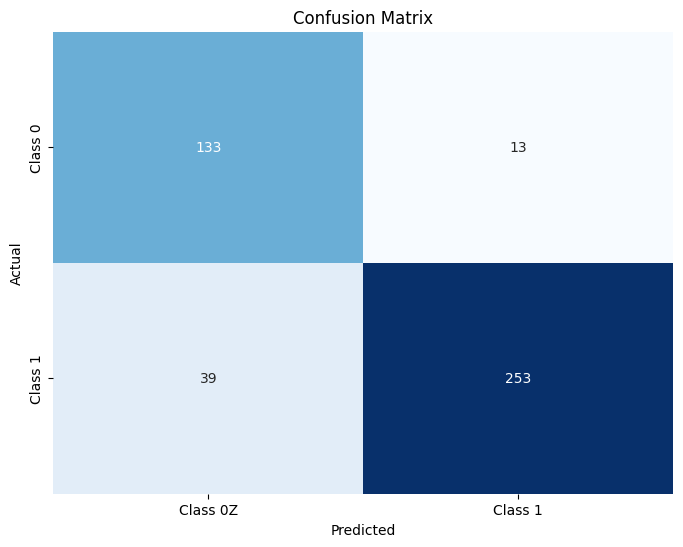

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0Z', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Evaluate

## OneClassSVM

In [ ]:
model = OneClassSVM()
param_grid = {
    'kernel': ['rbf'],
    'nu': [0.01, 0.05, 0.1, 0.5],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'tol': [1e-3, 1e-4, 1e-5],
    'cache_size': [100, 200, 300],
    'coef0': [0.0, 0.1, 0.2],
    'max_iter': [1000, 2000, 3000],
    'shrinking': [True, False],
    'verbose': [True, False],
}


from sklearn.model_selection import GridSearchCV
# Thiết lập Grid Search sử dụng scorer
grid_search = GridSearchCV(model, param_grid, cv=5,scoring = 'f1_macro', verbose=2)
# Huấn luyện Grid Search
grid_search.fit(X1[:1000],np.ones(1000))

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=scale, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degre

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degr

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degre

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=3, gam

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.0, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gam

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=aut

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, ga

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.1, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=2, gam

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degr

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider


[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=100, coef0=0.2, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.1, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degre

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degr

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degr

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kerne

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=200, coef0=0.2, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.0s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.0, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=3, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.1, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.0s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=2, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, ga

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=3

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, d

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.01, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.05, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.001, verbose=False; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=0.0001, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=1000, nu=0.5, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.01, shrinking=True, tol=0.001, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=True, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=True; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.1, shrinking=False, tol=1e-05, verbose=False; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamma=auto, kernel=rbf, max_iter=2000, nu=0.5, shrinking=True, tol=0.001, verbose=True; total time=   0.1s
[LibSVM][CV] END cache_size=300, coef0=0.2, degree=4, gamm

GridSearchCV(cv=5, estimator=OneClassSVM(),
             param_grid={'cache_size': [100, 200, 300],
                         'coef0': [0.0, 0.1, 0.2], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf'],
                         'max_iter': [1000, 2000, 3000],
                         'nu': [0.01, 0.05, 0.1, 0.5],
                         'shrinking': [True, False],
                         'tol': [0.001, 0.0001, 1e-05],
                         'verbose': [True, False]},
             scoring='f1_macro', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'cache_size': 100,
 'coef0': 0.0,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 1000,
 'nu': 0.05,
 'shrinking': True,
 'tol': 1e-05,
 'verbose': True}

In [ ]:
best_model.fit(X1)

[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


OneClassSVM(cache_size=100, degree=2, max_iter=1000, nu=0.01, tol=1e-05,
            verbose=True)

In [ ]:
Y_label_encoded = [np.argmax(y) for y in y1]

In [ ]:
# Convert the list to a NumPy array if needed
Y_label_encoded = np.array(y1)

## Random Forest

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(
  contamination =0.05,
  max_features = 0.6,
  max_samples= 0.5,
  n_estimators= 200,
  bootstrap = True,
  n_jobs= None,
  random_state = None,
  warm_start=False,
  verbose=1)
# Assuming X1 contains your training data, fit the model
model.fit(X1)

# To predict anomalies, the predict method returns +1 for an inlier and -1 for an outlier/anomaly
y_test_pred = model.predict(X3)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_samples': [0.5, 0.7, 1.0, 'auto'],  # Thêm 'auto'
    'contamination': [0.05, 0.1, 0.2, 'auto'],  # Thêm 'auto'
    'max_features': [1.0, 0.8, 0.6, 0.4],
    'bootstrap': [False, True],  # Thêm bootstrap
    'n_jobs': [None, -1],  # Thêm n_jobs
    'random_state': [None, 42],  # Thêm random_state
    'verbose': [0, 1],  # Thêm verbose
    'warm_start': [False, True]  # Thêm warm_start
}


In [ ]:
accuracy = accuracy_score(y_true, y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.684931506849315


In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
param_grid = {
    'n_estimators': [50,100,200],
    'max_samples': [ 0.5,'auto'],
    'contamination': [0.05],
    'max_features': [1.0, 0.8, 0.6, 0.4],
    'bootstrap': [False, True],
    'n_jobs': [None, -1],
    'random_state': [None, 42],
    'warm_start' : [True, False]

}
from sklearn.model_selection import GridSearchCV
# Thiết lập Grid Search sử dụng scorer
grid_search = GridSearchCV(model, param_grid, cv=5,scoring = 'f1_macro', verbose=2)
# Huấn luyện Grid Search
grid_search.fit(X1[:100],np.ones(100))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=None, random_state=None, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=None, random_state=None, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=None, random_state=None, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=None, random_state=None, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=None, random_state=None, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, contamination=0.05, max_features=1.0, max_samples=0.5, n_estimators=50, n_jobs=N

GridSearchCV(cv=5, estimator=IsolationForest(),
             param_grid={'bootstrap': [False, True], 'contamination': [0.05],
                         'max_features': [1.0, 0.8, 0.6, 0.4],
                         'max_samples': [0.5, 'auto'],
                         'n_estimators': [50, 100, 200], 'n_jobs': [None, -1],
                         'random_state': [None, 42],
                         'warm_start': [True, False]},
             scoring='f1_macro', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'bootstrap': True,
 'contamination': 0.05,
 'max_features': 0.6,
 'max_samples': 0.5,
 'n_estimators': 200,
 'n_jobs': None,
 'random_state': None,
 'warm_start': False}

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Định nghĩa số chiều của vector đầu vào
input_dim = 2 # Đây là số chiều của biểu diễn từ

# Định nghĩa các layers của autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(units=2, activation='relu')(input_layer)  # Đã chỉnh số nơ-ron ẩn thành 80
decoded = Dense(units=input_dim, activation='sigmoid')(encoded)

# Xây dựng mô hình autoencoder
autoencoder = Model(input_layer, decoded)

# Compile mô hình
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Sử dụng hàm encoding để chuyển đổi dữ liệu text thành dạng số nguyên
X1_encoded = encoding(X_train, tokenizer=tokenizer)
X3_encoded = encoding(X_test, tokenizer=tokenizer)

# Chuẩn bị dữ liệu đầu vào cho mô hình Autoencoder
X1_encoded = np.array(X1_encoded)
X3_encoded = np.array(X3_encoded)

In [ ]:
len(X1_encoded)

24021

In [ ]:
# Sử dụng dữ liệu đã được chuẩn bị từ Word Embedding và preprocessing
#  y_train là một mảng gồm toàn số 1, đây là một tiêu chuẩn để huấn luyện mô hình Autoencoder
#autoencoder.fit(X1_encoded, np.ones(len(X1_encoded)), epochs=50, batch_size=64)

In [ ]:
# Sử dụng mô hình để dự đoán các mẫu trong tập kiểm tra
predicted_output = autoencoder.predict(X3_encoded)

10/10 [==============================] - 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_true,  )
print(f"Accuracy: {accuracy}")

ValueError: ignored

 # Auto Encoder

In [38]:
# Tạo mảng gồm 146 số 1
ones = np.ones(146)

# Tạo mảng gồm 146 số 0
zero = np.zeros(146)

# Kết hợp cả hai mảng
y_true = np.concatenate((ones, zero))

In [39]:
#Load Data
train_data = X1
test_data = X3
train_labels = np.ones(len(X1))
test_labels = y_true

In [40]:
# Chuẩn hóa dữ liệu về [0,1].
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [41]:
# Chia dữ liệu thành các nhóm giả và thiệt
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [42]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [78]:
# Xác định model
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(64, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(32, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(16, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(8, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization()])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(32, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(64, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(128, activation="relu"),
      layers.Dropout(0.1),
      layers.BatchNormalization(),

      layers.Dense(80, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [79]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [80]:
# Compile mô hình
autoencoder.compile(optimizer= optimizer, loss='mean_squared_error')

In [81]:
# Huấn luyện mô hình
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=40,
          batch_size=256,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/40
94/94 [==============================] - 8s 23ms/step - loss: 0.1458 - val_loss: 0.0203
Epoch 2/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0366 - val_loss: 0.0122
Epoch 3/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0222 - val_loss: 0.0121
Epoch 4/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0154 - val_loss: 0.0121
Epoch 5/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 6/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0100 - val_loss: 0.0121
Epoch 7/40
94/94 [==============================] - 1s 12ms/step - loss: 0.0084 - val_loss: 0.0122
Epoch 8/40
94/94 [==============================] - 1s 14ms/step - loss: 0.0044 - val_loss: 0.0122
Epoch 9/40
94/94 [==============================] - 3s 27ms/step - loss: 0.0041 - val_loss: 0.0122
Epoch 10/40
94/94 [==============================] - 3s 29ms/step - loss: 0.0042 - val_loss: 0.0121
Epoch 11/

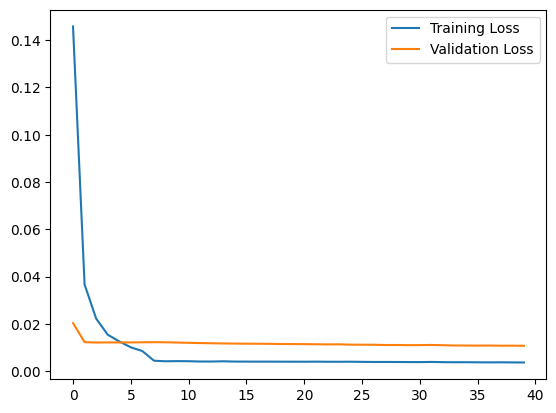

In [82]:
# Vẽ biểu đồ sự biến thiên của hàm mất mát trong quá trình huấn luyện
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

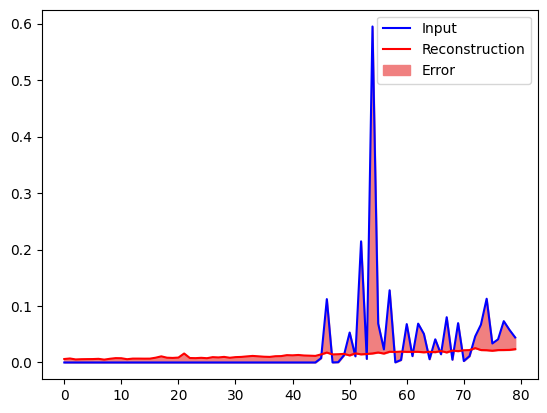

In [83]:
# Trích xuất dữ liệu mã hóa và giải mã dữ liệu job thật
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()
# Vẽ biểu đồ so sánh dữ liệu gốc và dữ liệu tái tạo
plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(80), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

751/751 [==============================] - 2s 2ms/step


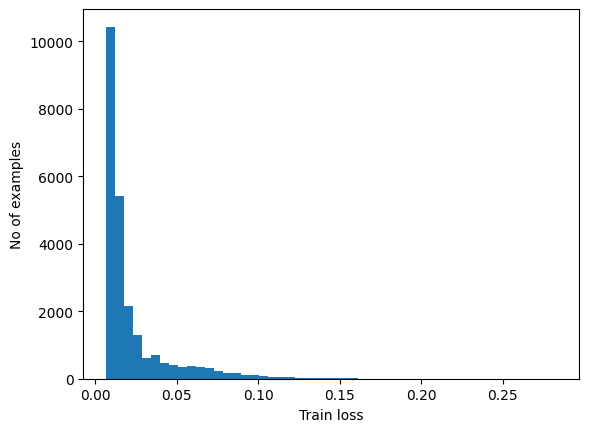

In [84]:
#  Hiển thị biểu đồ histogram của hàm mất mát trên dữ liệu huấn luyện
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [85]:
# Tạo hàm dự đoán và in các thống kê
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [86]:
import numpy as np
from sklearn.metrics import accuracy_score

list_accuracy = []
best_accuracy = 0
best_threshold = 0
best_preds = []

for i in range(50, 500, 1):
    threshold = np.mean(train_loss) + i * 0.01 * np.std(train_loss)
    preds = predict(autoencoder, test_data, threshold)
    accuracy = accuracy_score(preds, test_labels)
    list_accuracy.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_preds = preds.numpy().copy()

print("Best_accuracy:", best_accuracy)
print("Best_threshold:", best_threshold)
# best_preds chứa các dự đoán tốt nhất


Best_accuracy: 0.8458904109589042
Best_threshold: 0.040052219834178684


In [52]:
save_threshold = best_threshold
save_threshold

0.037126360014081

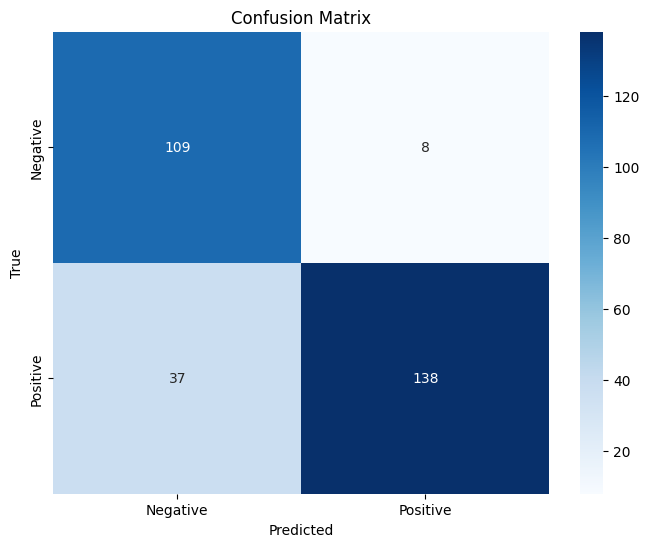

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tính confusion matrix
cm = confusion_matrix( best_preds,test_labels)

# Hiển thị confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# LSTM Encoder

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
# Tạo mảng gồm 146 số 1
ones = np.ones(146)

# Tạo mảng gồm 146 số 0
zero =  np.zeros(146)

# Kết hợp cả hai mảng
y_true = np.concatenate((ones, zero))

In [ ]:
#Load Data
train_data = X1
test_data = X3
train_labels = np.ones(len(X1))
test_labels = y_true

In [ ]:
# Chuẩn hóa dữ liệu về [0,1].
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
# Chia dữ liệu thành các nhóm giả và thiệt
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

In [ ]:
def prepare_sequences(data, time_steps):
    sequences = []
    num_samples = len(data)
    num_sequences = num_samples // time_steps

    # Đảm bảo số mẫu chia hết cho time_steps
    num_samples = num_sequences * time_steps
    padding = time_steps - (num_samples % time_steps)

    data_padded = np.pad(data, ((0, padding), (0, 0)), mode='constant')

    for i in range(0, num_samples, time_steps):
        sequences.append(data_padded[i:i+time_steps])

    return tf.convert_to_tensor(sequences)


time_steps = 2  # Độ dài của mỗi chuỗi thời gian
train_3D = prepare_sequences(normal_train_data, time_steps)
test_3D = prepare_sequences(test_data, time_steps)


In [ ]:
input_shape = (time_steps, 80)

In [ ]:
class LSTMAutoEncoder(Model):
    def __init__(self, input_shape):
        super(LSTMAutoEncoder, self).__init__()
        self.encoder = Sequential([
            layers.LSTM(128, activation="relu", return_sequences=True, input_shape=input_shape),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(64, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(32, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(16, activation="relu",return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(8, activation="relu",return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization()
        ])

        self.decoder = Sequential([
            layers.LSTM(16, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(32, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(64, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.LSTM(128, activation="relu", return_sequences=True),
            layers.Dropout(0.1),
            layers.BatchNormalization(),

            layers.TimeDistributed(Dense(input_shape[1], activation="sigmoid"))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [ ]:
lstm_autoencoder = LSTMAutoEncoder(input_shape)

In [ ]:
# Compile the model
lstm_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = lstm_autoencoder.fit(train_3D, train_3D,
          epochs=10,
          batch_size=256,
          validation_data=(test_3D, test_3D),
          shuffle=True)

Epoch 1/10
47/47 [==============================] - 27s 128ms/step - loss: 0.1832 - val_loss: 0.1350
Epoch 2/10
47/47 [==============================] - 4s 84ms/step - loss: 0.0619 - val_loss: 0.0306
Epoch 3/10
47/47 [==============================] - 3s 68ms/step - loss: 0.0313 - val_loss: 0.0149
Epoch 4/10
47/47 [==============================] - 3s 67ms/step - loss: 0.0214 - val_loss: 0.0126
Epoch 5/10
47/47 [==============================] - 4s 95ms/step - loss: 0.0171 - val_loss: 0.0121
Epoch 6/10
47/47 [==============================] - 4s 83ms/step - loss: 0.0140 - val_loss: 0.0121
Epoch 7/10
47/47 [==============================] - 3s 68ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 8/10
47/47 [==============================] - 3s 68ms/step - loss: 0.0104 - val_loss: 0.0121
Epoch 9/10
47/47 [==============================] - 4s 93ms/step - loss: 0.0081 - val_loss: 0.0121
Epoch 10/10
47/47 [==============================] - 4s 82ms/step - loss: 0.0073 - val_loss: 0.0122


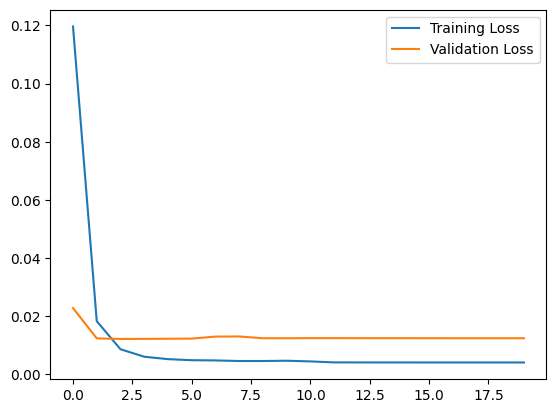

In [ ]:
# Vẽ biểu đồ sự biến thiên của hàm mất mát trong quá trình huấn luyện
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
#  Hiển thị biểu đồ histogram của hàm mất mát trên dữ liệu huấn luyện
reconstructions = lstm_autoencoder.predict(train_3D)
train_loss = tf.keras.losses.mae(reconstructions, train_3D)


751/751 [==============================] - 24s 30ms/step


In [ ]:
# Tạo hàm dự đoán và in các thống kê
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
list_accuracy = []
for i in range(50, 500, 1):
    threshold = np.mean(train_loss) + i*0.01* np.std(train_loss)
    preds = predict(lstm_autoencoder, test_3D, threshold)
    unique_preds = np.mean(preds, axis=1) < threshold
    list_accuracy.append(accuracy_score(unique_preds, test_labels))

print("Best_accuracy:",max(list_accuracy))

ValueError: ignored